In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import sys
import os 

# Set the path to the main directory to import the module, add the main directory to sys.path
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if path not in sys.path:
    sys.path.append(path)

from eurovision_vote_visualization import load_data

In [2]:
# Load the data
df = load_data(os.path.join(path, "data"), "contestants.csv")

In [3]:
df.head()

,year,to_country_id,to_country,song,place_contest,sf_num,running_final,running_sf,place_final,points_final,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf
0,2000,dk,Denmark,Fly On The Wings Of Love,1.0,NaN,14.0,NaN,1.0,195.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,ru,Russia,Solo,2.0,NaN,9.0,NaN,2.0,155.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,lv,Latvia,My Star,3.0,NaN,21.0,NaN,3.0,136.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,ee,Estonia,Once In A Lifetime,4.0,NaN,4.0,NaN,4.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,de,Germany,Wadde hadde dudde da?,5.0,NaN,15.0,NaN,5.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Analysis of the big five
# The Big Five are the five countries that contribute the most to the Eurovision Song Contest

df_big_five = df[df['to_country'].isin(['Germany', 'France', 'Italy', 'Spain', 'United Kingdom'])]

# Check from 2005 to 2012
df_big_five = df_big_five[df_big_five['year'].between(2011, 2023)]

/tmp/ipykernel_140887/3335696172.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


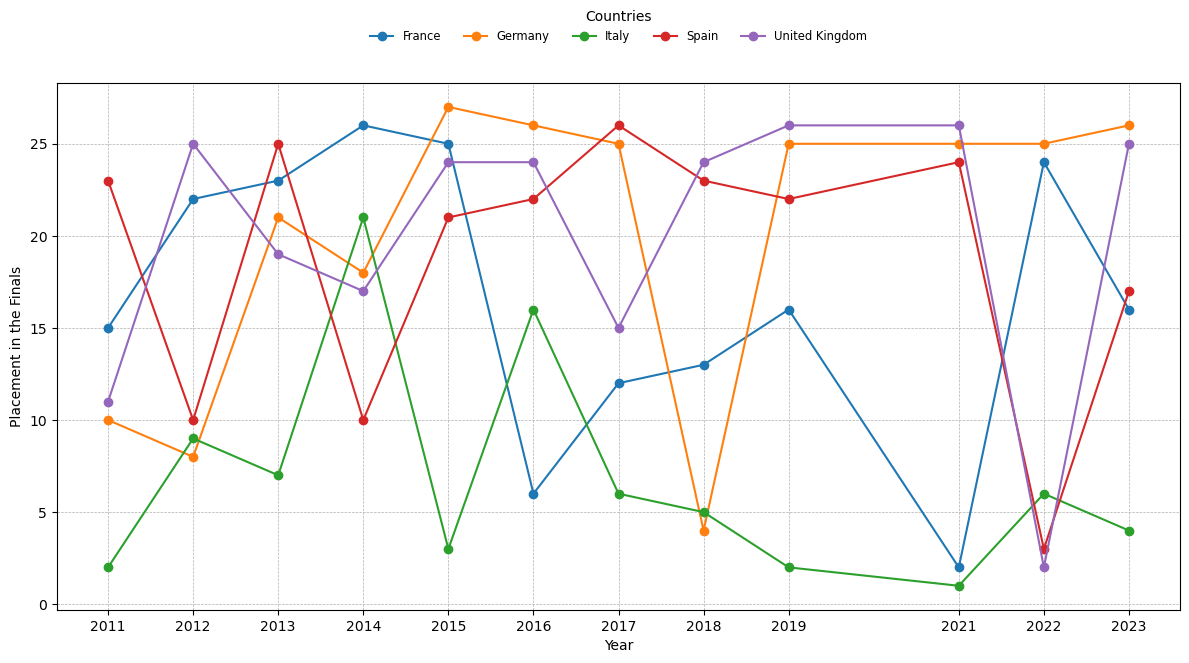

In [5]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
# Create a bar plot for the Big Five to show the placement of the countries in the finals
with pd.option_context('display.float_format', '{:.0f}'.format):
    df_big_five.groupby(['year', 'to_country'])['place_final'].mean().unstack().plot(kind='line', ax=ax, legend=True, marker='o')

# Set the title and labels
ax.set(
    #title='Big Five Placement in the Finals (2005-2012)',
    xlabel='Year',
    ylabel='Placement in the Finals',
    xticks=df_big_five['year'].unique(),
)
fig.tight_layout()
# Move the legend outside the plot to the bottom, remove border and make it one line 
ax.legend( title='Countries', bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=6, fontsize='small', borderpad=0, frameon=False)
ax.grid(visible=True, linestyle='--', linewidth=0.5)  
fig.show()

/tmp/ipykernel_140887/4143111909.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


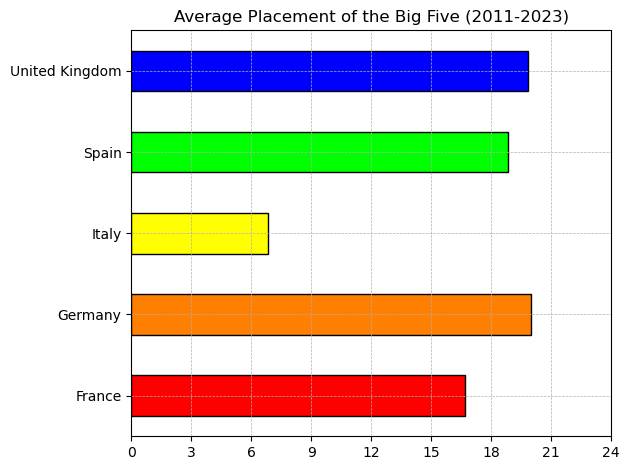

In [6]:
# Plot the average placement of the Big Five between 2011 and 2023, plot from the y-axis
fig, ax = plt.subplots()
df_big_five.groupby(['to_country'])['place_final'].mean().plot(kind='barh', ax=ax,  color=['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF'], edgecolor='black')

# Set the title and labels
ax.set(
    title='Average Placement of the Big Five (2011-2023)',
    ylabel='',
    xticks= range(0, 26, 3),  
)
ax.grid(visible=True, linestyle='--', linewidth=0.5)
fig.tight_layout()
fig.show()